<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 7: Clustering</h1>
    <h3></h3>
</center>

## <center> Case: Toy datasets

## Coding section
### Abstract:

<font face="Times New Roman">This example shows characteristics of different clustering algorithms on 2D datasets that are “interesting”. </font>

<font face="Times New Roman">1. Data processing: We generate the toy datasets.</font>

<font face="Times New Roman">2. Model training and prediction: We use different clustering models to fit the dataset. Calculate the performance metrics to evaluate these models.</font>
    
<font face="Times New Roman">3. Visualizing results: Plot clustering results of these models.</font>

### Problem Description:
    
<font face="Times New Roman">Comparison of different clustering methods on a 2D toy datasets. 

<font face="Times New Roman"> We use following methods:

<font face="Times New Roman"> 1. Agglomerative Clustering

<font face="Times New Roman"> 2. K-means Clustering

<font face="Times New Roman"> 3. Gaussian Mixture Models

<font face="Times New Roman"> 4. DBSCAN

### 1. Data processing

In [1]:
# Load Packages
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
# Data Generating
n_samples = 500
seed = 30

# Circles
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

# Moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

# Blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# No sturcture data
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropic distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# datasets
data_list = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
k_list = [2,2,3,3,3,3] # predefined cluster numbers
eps_list = [0.15,0.15,1.0,0.5,0.5,0.1] # predefined epsilon

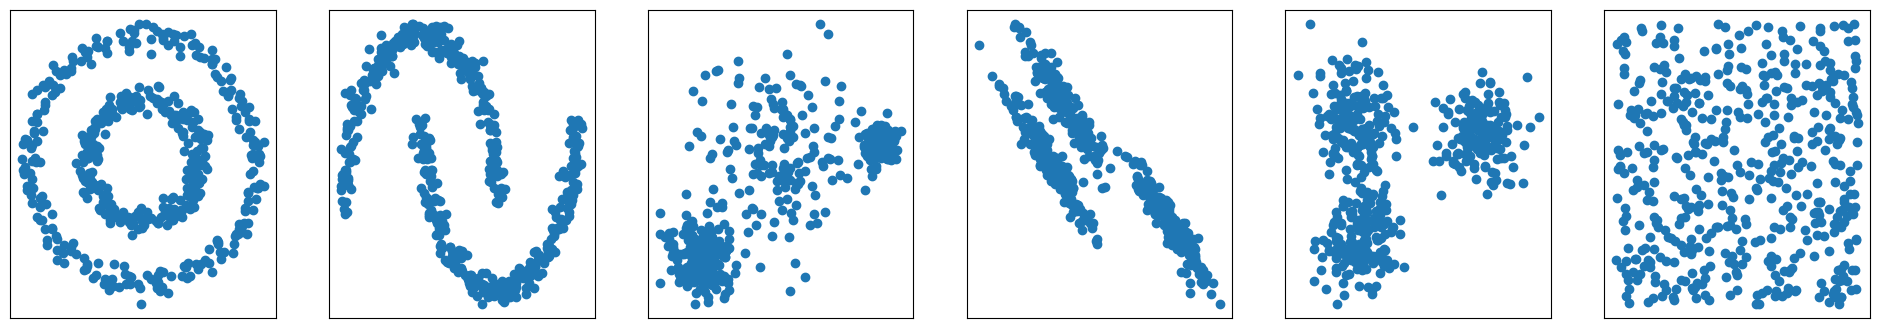

In [3]:
# Visualize toy datasets
import matplotlib.pyplot as plt
plt.figure(figsize = (24,4))

for i, data in enumerate(data_list):
    X, y = data
    plt.subplot(1,6,i+1)
    plt.scatter(X[:,0],X[:,1])
    plt.xticks(())
    plt.yticks(())
    
plt.show()

### 2. Model training and prediction

In [4]:
# Load Python packages
from sklearn import cluster, mixture

In [5]:
# Different clustering models
models = [[] for i in range(0,6)] # 2D list
y_pred_list = [[] for i in range(0,6)] # 2D list

for i, data in enumerate(data_list):
    X, y = data
    k = k_list[i]
    eps = eps_list[i]
    
    # Agglomerative
    average = cluster.AgglomerativeClustering(
        linkage="average", n_clusters=k
    )
    ward = cluster.AgglomerativeClustering(
        linkage="ward", n_clusters=k
    )

    # K-means
    Kmeans = cluster.KMeans(n_clusters=k, random_state=42, n_init="auto")
    
    # GMM
    gmm = mixture.GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    
    # DBSCAN
    dbscan = cluster.DBSCAN(eps=eps, min_samples=5)
    
    models[i] = [average, ward, Kmeans, gmm, dbscan]
    
    for model in models[i]:
        
        # fit the model
        model.fit(X)

        # predict labels
        if hasattr(model, "labels_"):
            y_pred_list[i].append(model.labels_)
        else:
            y_pred_list[i].append(model.predict(X))
        
model_names = ("Agglomerative Clustering (average linkage)", "Agglomerative Clustering (ward linkage)",
              "K-means Clustering", "Gaussian Mixture Models", "DBSCAN")

Exception in thread Thread-43 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\yuche\anaconda3\envs\py_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\yuche\anaconda3\envs\py_env\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\yuche\anaconda3\envs\py_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\yuche\anaconda3\envs\py_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 4: invalid continuation byte
c:\Users\yuche\anaconda3\envs\py_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the 

In [6]:
from sklearn.metrics import silhouette_score

SI_list = [[] for i in range(0,6)]

print("Silhouette Coefficient Reports")
for i, data in enumerate(data_list):
    print("----------- Dataset "+str(i)+" ------------")
    X, y = data
    for (y_pred, model_name) in  zip(y_pred_list[i], model_names):
        _, cluster_counts = np.unique(y_pred, return_counts=True)
        cluster_num = len(cluster_counts)
        if cluster_num > 1:
            # SI score
            SI = silhouette_score(X, y_pred)
        else: # Fail to cluster
            SI = -1
        SI_list[i].append(SI)
        print(model_name + " :"+str(np.around(SI,decimals = 4)))

Silhouette Coefficient Reports
----------- Dataset 0 ------------
Agglomerative Clustering (average linkage) :0.3442
Agglomerative Clustering (ward linkage) :0.3116
K-means Clustering :0.3456
Gaussian Mixture Models :0.3459
DBSCAN :0.1138
----------- Dataset 1 ------------
Agglomerative Clustering (average linkage) :0.4448
Agglomerative Clustering (ward linkage) :0.4448
K-means Clustering :0.4881
Gaussian Mixture Models :0.465
DBSCAN :0.332
----------- Dataset 2 ------------
Agglomerative Clustering (average linkage) :0.4747
Agglomerative Clustering (ward linkage) :0.6445
K-means Clustering :0.6549
Gaussian Mixture Models :0.6159
DBSCAN :0.5244
----------- Dataset 3 ------------
Agglomerative Clustering (average linkage) :0.4998
Agglomerative Clustering (ward linkage) :0.4866
K-means Clustering :0.501
Gaussian Mixture Models :0.4674
DBSCAN :0.4437
----------- Dataset 4 ------------
Agglomerative Clustering (average linkage) :0.6427
Agglomerative Clustering (ward linkage) :0.6468
K-mean

### 3. Visualizing results

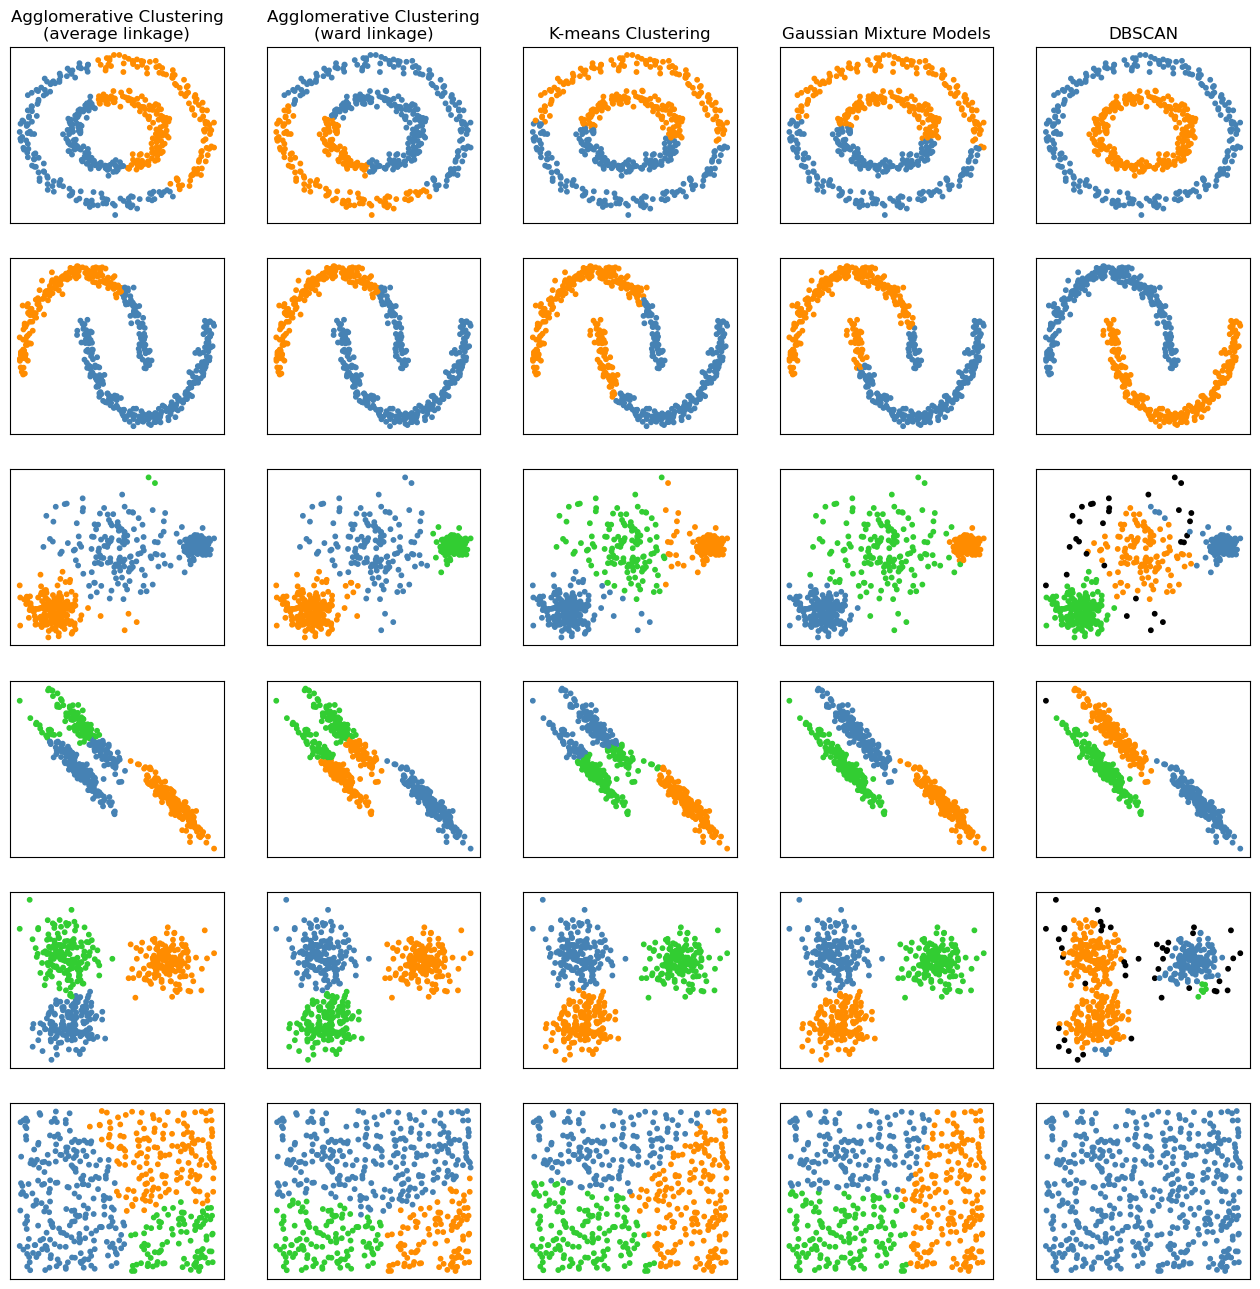

In [7]:
from itertools import cycle, islice

# title for the plots
titles = (
    "Agglomerative Clustering\n(average linkage)", "Agglomerative Clustering\n(ward linkage)",
    "K-means Clustering", "Gaussian Mixture Models", "DBSCAN"
)

plt.figure(figsize = (16,16))
plot_num = 1
for i, data in enumerate(data_list):
    
    X, y = data
    
    for j, y_pred in enumerate(y_pred_list[i]):
        colors = np.array(list(islice(cycle(["steelblue","darkorange","limegreen",]),int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, "black")
        
        # plot the result
        plt.subplot(6, 5, plot_num)
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xticks(())
        plt.yticks(())
        plot_num +=1
    
        if i == 0:
            plt.title(titles[j])